#Get the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/Data.xlsx', sheet_name='Data')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
selected_features = [
    "Width", "Annealed", "MaxMillSpeed", "EntryTensionSetpoint", "ExitTensionSetpoint",
    "MaxRollBend", "MeanRollBend", "MeanRollForce", "MeanCoolantFlow", "BUR_Top_ID1",
    "WKR_Bot_Diam", "BUR_Bot_ID", "BUR_Bot_Diam", "MaxRollForce", "MeanTilt", "Scoring"
]
data = df[selected_features].copy()

In [ ]:
data.head()

,Width,Annealed,MaxMillSpeed,EntryTensionSetpoint,ExitTensionSetpoint,MaxRollBend,MeanRollBend,MeanRollForce,MeanCoolantFlow,BUR_Top_ID1,WKR_Bot_Diam,BUR_Bot_ID,BUR_Bot_Diam,MaxRollForce,MeanTilt,Scoring
0,865,0.0,807.845,2.199206,3.998556,75.1686,22.05430,699798,773.969,794.8,288.14,SFR-13,793.7,1116930,-0.005500,No
1,775,1.0,858.119,1.499458,2.499097,83.0382,29.74900,900379,539.231,794.8,291.46,SFR-13,793.7,1719300,0.018141,No
2,775,0.0,802.175,2.798989,3.998556,61.3240,13.61310,518945,622.780,794.8,289.92,SFR-13,793.7,1383310,-0.022072,No
3,775,0.0,802.513,2.798989,3.998556,54.2864,8.40003,670191,664.544,794.8,298.32,SFR-13,793.7,1440330,0.041256,No
4,800,1.0,904.573,2.786333,3.986695,98.4368,72.69720,1153010,733.074,794.8,298.32,SFR-13,793.7,1651990,-0.021783,No


In [ ]:
data.shape

(12541, 16)

In [ ]:
data['Scoring'].value_counts()

,count
Scoring,
No,12343
Y,198


In [ ]:
data['Width'].value_counts()

,count
Width,
800,4261
865,2760
775,2696
760,2433
810,140
780,129
770,122


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Scoring'] = label_encoder.fit_transform(data['Scoring'])

In [ ]:
data['Annealed'].fillna(0, inplace=True)

<ipython-input-34-1b672e073800>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Annealed'].fillna(0, inplace=True)


In [ ]:
data.describe()

,Width,Annealed,MaxMillSpeed,EntryTensionSetpoint,ExitTensionSetpoint,MaxRollBend,MeanRollBend,MeanRollForce,MeanCoolantFlow,BUR_Top_ID1,WKR_Bot_Diam,BUR_Bot_Diam,MaxRollForce,MeanTilt,Scoring
count,12541.000000,12541.000000,12541.000000,12541.000000,12541.000000,12541.000000,12541.000000,1.254100e+04,12541.000000,12541.000000,12541.000000,12541.000000,1.254100e+04,12541.000000,12541.000000
mean,800.784626,0.387688,914.843275,1.806735,3.152507,24.683069,-11.131960,8.536160e+05,660.683312,797.667395,296.091145,794.275441,1.685667e+06,0.026377,0.015788
std,37.256899,0.487242,107.366011,0.487009,0.669450,33.060002,16.624508,2.408099e+05,81.852187,2.166268,7.646195,3.102887,4.706657e+05,0.090025,0.124660
min,760.000000,0.000000,330.300000,0.799711,1.799350,-40.969200,-55.393200,1.432480e+05,401.206000,791.200000,285.000000,790.600000,6.538750e+05,-0.266590,0.000000
25%,775.000000,0.000000,812.246000,1.199567,2.499097,-1.370580,-22.300200,6.655810e+05,603.216000,795.500000,289.800000,791.500000,1.338750e+06,-0.027346,0.000000
50%,800.000000,0.000000,905.430000,1.799350,2.798989,18.544500,-14.900800,8.271230e+05,659.433000,798.800000,294.000000,793.300000,1.611710e+06,0.022817,0.000000
75%,800.000000,1.000000,1004.520000,2.199206,3.998556,43.207000,-2.916120,1.002380e+06,715.458000,799.000000,304.560000,798.100000,1.957060e+06,0.075527,0.000000
max,865.000000,1.000000,1158.310000,3.498736,4.969745,131.321000,94.836100,2.358890e+06,963.442000,800.100000,310.900000,800.000000,5.815580e+06,0.650253,1.000000


In [ ]:
data.isnull().sum()

,0
Width,0
Annealed,0
MaxMillSpeed,0
EntryTensionSetpoint,0
ExitTensionSetpoint,0
MaxRollBend,0
MeanRollBend,0
MeanRollForce,0
MeanCoolantFlow,0
BUR_Top_ID1,0


#1. Addressing Problem Statement 1

In [ ]:
unique_widths = data['Width'].unique()

sub_dfs = {}


for w in unique_widths:
    subset = data[data['Width'] == w]
    sub_dfs[w] = subset

df_760 = sub_dfs[760.0]
df_770 = sub_dfs[770.0]
df_775 = sub_dfs[775.0]
df_780 = sub_dfs[780.0]
df_800 = sub_dfs[800.0]
df_810 = sub_dfs[810.0]
df_865 = sub_dfs[865.0]

## 1 - Chi-Square Test

In [ ]:
import scipy.stats as stats
import pandas as pd

for width, df in zip([760, 770, 775, 780, 800, 810, 865],
                     [df_760, df_770, df_775, df_780, df_800, df_810, df_865]):

    contingency_table = pd.crosstab(df['BUR_Bot_ID'], df['Scoring'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Width {width}: Chi-Square Test")
    print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}\n")

Width 760: Chi-Square Test
Chi-Square Statistic: 149.5760, p-value: 0.0000

Width 770: Chi-Square Test
Chi-Square Statistic: 6.7970, p-value: 0.5587

Width 775: Chi-Square Test
Chi-Square Statistic: 35.3526, p-value: 0.0001

Width 780: Chi-Square Test
Chi-Square Statistic: 5.6213, p-value: 0.6896

Width 800: Chi-Square Test
Chi-Square Statistic: 116.2782, p-value: 0.0000

Width 810: Chi-Square Test
Chi-Square Statistic: 16.9082, p-value: 0.0180

Width 865: Chi-Square Test
Chi-Square Statistic: 471.6581, p-value: 0.0000



## 2. ANOVA

In [ ]:
from scipy.stats import f_oneway

num_params = [col for col in data.columns if col not in ['Width', 'BUR_Bot_ID', 'Scoring']]
significant_params = {}


for width, df in zip([760, 770, 775, 780, 800, 810, 865],
                     [df_760, df_770, df_775, df_780, df_800, df_810, df_865]):

    print(f"Width {width}: ANOVA Results")

    significant_params[width] = []

    for param in num_params:
        group0 = df[df['Scoring'] == 0][param]
        group1 = df[df['Scoring'] == 1][param]

        if group0.nunique() > 1 and group1.nunique() > 1:
            f_stat, p_value = f_oneway(group0, group1)

            print(f"{param}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

            if p_value < 0.05:
                significant_params[width].append(param)

    print("\n" + "-"*50 + "\n")

significant_params = {k: v for k, v in significant_params.items() if v}

print("\nSignificant Parameters by Width:")
for width, params in significant_params.items():
    print(f"Width {width}: {', '.join(params) if params else 'None'}")

Width 760: ANOVA Results
Annealed: F-statistic = 0.0161, p-value = 0.8989
MaxMillSpeed: F-statistic = 5.5778, p-value = 0.0183
EntryTensionSetpoint: F-statistic = 5.0045, p-value = 0.0254
ExitTensionSetpoint: F-statistic = 1.0545, p-value = 0.3046
MaxRollBend: F-statistic = 3.6433, p-value = 0.0564
MeanRollBend: F-statistic = 0.8149, p-value = 0.3668
MeanRollForce: F-statistic = 4.0277, p-value = 0.0449
MeanCoolantFlow: F-statistic = 2.8811, p-value = 0.0898
BUR_Top_ID1: F-statistic = 6.6957, p-value = 0.0097
WKR_Bot_Diam: F-statistic = 0.5558, p-value = 0.4560
BUR_Bot_Diam: F-statistic = 3.3036, p-value = 0.0693
MaxRollForce: F-statistic = 2.9962, p-value = 0.0836
MeanTilt: F-statistic = 2.0443, p-value = 0.1529

--------------------------------------------------

Width 770: ANOVA Results
Annealed: F-statistic = 0.4537, p-value = 0.5019
MaxMillSpeed: F-statistic = 0.8521, p-value = 0.3578
EntryTensionSetpoint: F-statistic = 0.4538, p-value = 0.5018
ExitTensionSetpoint: F-statistic = 0

## 3. T-tests

In [ ]:
from scipy.stats import ttest_ind

process_params = [
    'MaxMillSpeed', 'EntryTensionSetpoint', 'ExitTensionSetpoint',
    'MaxRollBend', 'MeanRollBend', 'MeanRollForce', 'MeanCoolantFlow',
    'BUR_Top_ID1', 'WKR_Bot_Diam', 'BUR_Bot_Diam',
    'MaxRollForce', 'MeanTilt'
]

width_dataframes = {
    760: df_760, 770: df_770, 775: df_775, 780: df_780,
    800: df_800, 810: df_810, 865: df_865
}

for width, df in width_dataframes.items():
    print(f"Width {width}: T-Test Results\n" + "-"*50)

    group0 = df[df['Scoring'] == 0]
    group1 = df[df['Scoring'] == 1]

    for param in process_params:
        t_stat, p_value = ttest_ind(group0[param], group1[param], equal_var=False, nan_policy='omit')

        print(f"{param}: T-statistic = {t_stat:.4f}, p-value = {p_value:.4f}\n" + "-"*50)


Width 760: T-Test Results
--------------------------------------------------
MaxMillSpeed: T-statistic = -2.4184, p-value = 0.0203
--------------------------------------------------
EntryTensionSetpoint: T-statistic = -2.4982, p-value = 0.0167
--------------------------------------------------
ExitTensionSetpoint: T-statistic = -1.1351, p-value = 0.2631
--------------------------------------------------
MaxRollBend: T-statistic = 2.5787, p-value = 0.0137
--------------------------------------------------
MeanRollBend: T-statistic = 1.3733, p-value = 0.1771
--------------------------------------------------
MeanRollForce: T-statistic = 2.1872, p-value = 0.0347
--------------------------------------------------
MeanCoolantFlow: T-statistic = -1.9156, p-value = 0.0627
--------------------------------------------------
BUR_Top_ID1: T-statistic = -8.0385, p-value = 0.0000
--------------------------------------------------
WKR_Bot_Diam: T-statistic = -0.7552, p-value = 0.4546
---------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## 4. Pearson/Spearman correlation

In [ ]:
import scipy.stats as stats


num_params = ['MaxMillSpeed', 'EntryTensionSetpoint', 'ExitTensionSetpoint',
              'MaxRollBend', 'MeanRollBend', 'MeanRollForce', 'MeanCoolantFlow',
              'WKR_Bot_Diam', 'BUR_Bot_Diam', 'MaxRollForce', 'MeanTilt']

corr_results = {}


for width in [760, 770, 775, 780, 800, 810, 865]:
    df_subset = data[data['Width'] == width]
    pearson_corr = df_subset[num_params].corrwith(df_subset['Scoring'], method='pearson')
    spearman_corr = df_subset[num_params].corrwith(df_subset['Scoring'], method='spearman')


    corr_results[width] = {'Pearson': pearson_corr, 'Spearman': spearman_corr}

for width, corr in corr_results.items():
    print(f"Width {width}: Correlation Results")
    print("--------------------------------------------------")
    print("Pearson Correlation:\n", corr['Pearson'])
    print("--------------------------------------------------")
    print("Spearman Correlation:\n", corr['Spearman'])
    print("--------------------------------------------------\n")


Width 760: Correlation Results
--------------------------------------------------
Pearson Correlation:
 MaxMillSpeed            0.047846
EntryTensionSetpoint    0.045325
ExitTensionSetpoint     0.020823
MaxRollBend            -0.038684
MeanRollBend           -0.018306
MeanRollForce          -0.040670
MeanCoolantFlow         0.034406
WKR_Bot_Diam            0.015119
BUR_Bot_Diam           -0.036839
MaxRollForce           -0.035085
MeanTilt                0.028987
dtype: float64
--------------------------------------------------
Spearman Correlation:
 MaxMillSpeed            0.043929
EntryTensionSetpoint    0.048460
ExitTensionSetpoint     0.032417
MaxRollBend            -0.033545
MeanRollBend           -0.002316
MeanRollForce          -0.038894
MeanCoolantFlow         0.039388
WKR_Bot_Diam            0.012991
BUR_Bot_Diam           -0.040834
MaxRollForce           -0.037645
MeanTilt                0.039724
dtype: float64
--------------------------------------------------

Width 770: Cor

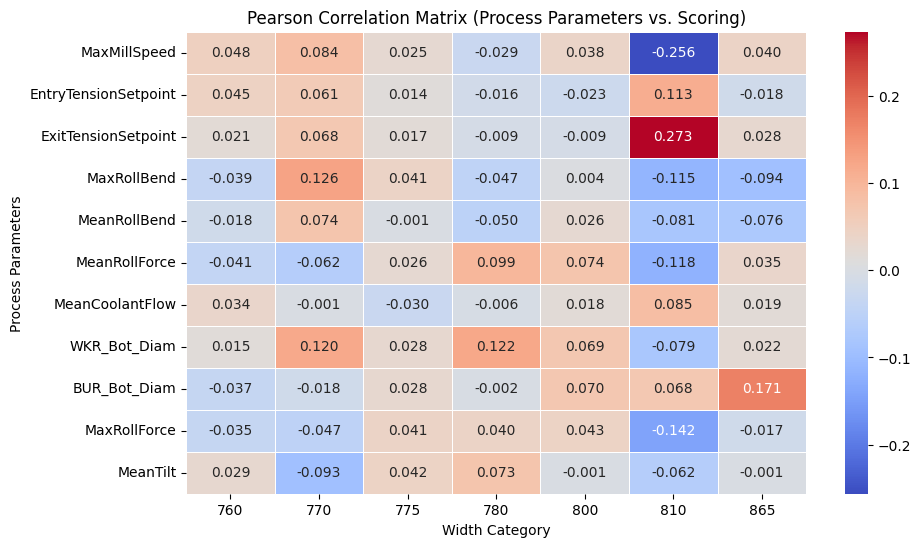

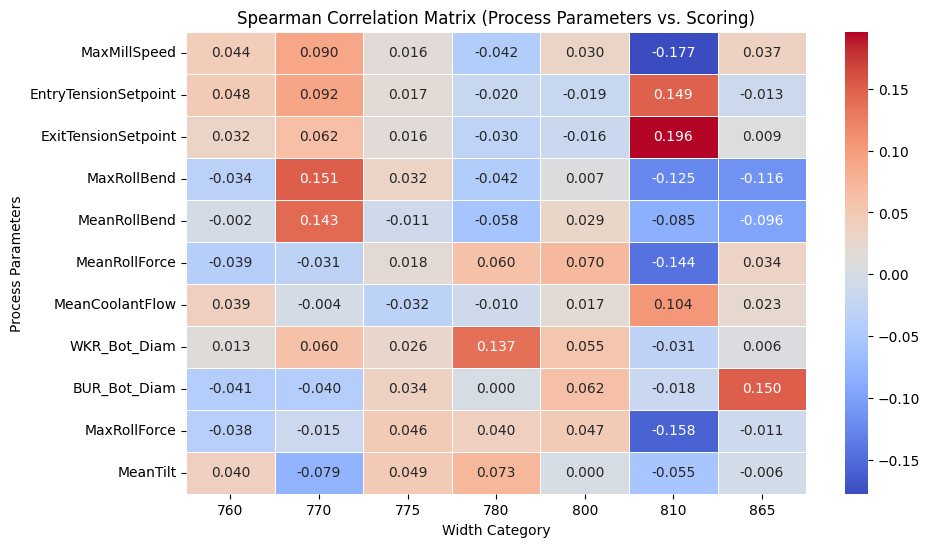

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


pearson_corr_matrix = pd.DataFrame({width: corr_results[width]['Pearson'] for width in corr_results})
spearman_corr_matrix = pd.DataFrame({width: corr_results[width]['Spearman'] for width in corr_results})


plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".3f", linewidths=0.5)
plt.title("Pearson Correlation Matrix (Process Parameters vs. Scoring)")
plt.xlabel("Width Category")
plt.ylabel("Process Parameters")
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".3f", linewidths=0.5)
plt.title("Spearman Correlation Matrix (Process Parameters vs. Scoring)")
plt.xlabel("Width Category")
plt.ylabel("Process Parameters")
plt.show()


## 5. Two-Way ANOVA to check interactions between key process parameters.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools

num_params = [
    'MaxMillSpeed', 'EntryTensionSetpoint', 'ExitTensionSetpoint', 'MaxRollBend',
    'MeanRollBend', 'MeanRollForce', 'MeanCoolantFlow', 'WKR_Bot_Diam',
    'BUR_Bot_Diam', 'MaxRollForce', 'MeanTilt'
]

interaction_pairs = list(itertools.combinations(num_params, 2))

anova_results = {}

for width in [760, 770, 775, 780, 800, 810, 865]:
    df_subset = data[data['Width'] == width]
    anova_results[width] = {}

    for param1, param2 in interaction_pairs:
        formula = f'Scoring ~ {param1} + {param2} + {param1}:{param2}'
        model = ols(formula, data=df_subset).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        anova_results[width][(param1, param2)] = anova_table.loc[f'{param1}:{param2}', 'PR(>F)']

for width, interactions in anova_results.items():
    print(f"Width {width}: Significant Interaction Effects (Two-Way ANOVA)")
    print("--------------------------------------------------")
    for (param1, param2), p_val in interactions.items():
        if p_val < 0.05:
            print(f"Interaction: {param1} * {param2}, p-value = {p_val:.4f}")
    print("--------------------------------------------------\n")

Width 760: Significant Interaction Effects (Two-Way ANOVA)
--------------------------------------------------
Interaction: MaxMillSpeed * BUR_Bot_Diam, p-value = 0.0003
Interaction: EntryTensionSetpoint * MaxRollForce, p-value = 0.0148
Interaction: ExitTensionSetpoint * MaxRollForce, p-value = 0.0200
--------------------------------------------------

Width 770: Significant Interaction Effects (Two-Way ANOVA)
--------------------------------------------------
Interaction: EntryTensionSetpoint * MeanCoolantFlow, p-value = 0.0311
--------------------------------------------------

Width 775: Significant Interaction Effects (Two-Way ANOVA)
--------------------------------------------------
Interaction: MaxMillSpeed * WKR_Bot_Diam, p-value = 0.0000
Interaction: MaxMillSpeed * BUR_Bot_Diam, p-value = 0.0000
Interaction: MaxRollBend * MeanRollBend, p-value = 0.0149
Interaction: MeanRollBend * MeanCoolantFlow, p-value = 0.0458
Interaction: MeanRollBend * WKR_Bot_Diam, p-value = 0.0164
Interac

## 6. Response Surface Methodology (RSM)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

# List of width-specific dataframes
width_dataframes = [df_760, df_770, df_775, df_780, df_800, df_810, df_865]
width_labels = [760, 770, 775, 780, 800, 810, 865]

# Define process parameters (excluding categorical)
process_parameters = ['MaxMillSpeed', 'EntryTensionSetpoint', 'ExitTensionSetpoint',
                      'MaxRollBend', 'MeanRollBend', 'MeanRollForce', 'MeanCoolantFlow',
                      'WKR_Bot_Diam','BUR_Bot_Diam', 'MaxRollForce', 'MeanTilt']

degree = 2  # Second-order polynomial for RSM

for df, width in zip(width_dataframes, width_labels):
    print(f"\nRunning RSM for Width {width}")

    # Drop rows with missing values
    df_clean = df.dropna(subset=process_parameters + ['Scoring'])

    # Extract features and target
    X = df_clean[process_parameters]
    y = df_clean['Scoring']

    # Polynomial feature expansion
    poly = PolynomialFeatures(degree, interaction_only=False, include_bias=True)
    X_poly = poly.fit_transform(X)

    # Fit the logistic regression model using GLM
    model = sm.GLM(y, X_poly, family=sm.families.Binomial())
    result = model.fit()

    # Define optimization function for defect probability minimization
    def defect_probability(x):
        x_poly = poly.transform(x.reshape(1, -1))
        prob = result.predict(x_poly)
        return prob[0]

    # Initial guess and bounds for optimization
    x0 = np.mean(X, axis=0)
    bounds = [(X[col].min(), X[col].max()) for col in process_parameters]

    # Perform optimization
    opt_result = minimize(defect_probability, x0, bounds=bounds, method='L-BFGS-B')

    print("Optimal Parameter Values to Minimize Defects:")
    for param, value in zip(process_parameters, opt_result.x):
        print(f"{param}: {value:.4f}")

    print("\nOptimization Completed for Width", width)



Running RSM for Width 760


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWar

Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 906.9413
EntryTensionSetpoint: 1.7710
ExitTensionSetpoint: 3.1368
MaxRollBend: 20.0560
MeanRollBend: -15.8785
MeanRollForce: 901505.4714
MeanCoolantFlow: 614.2743
WKR_Bot_Diam: 295.9962
BUR_Bot_Diam: 794.4511
MaxRollForce: 1783902.9388
MeanTilt: 0.0256

Optimization Completed for Width 760

Running RSM for Width 770
Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 904.9111
EntryTensionSetpoint: 2.0099
ExitTensionSetpoint: 3.4183
MaxRollBend: 31.3893
MeanRollBend: -14.1136
MeanRollForce: 829360.8197
MeanCoolantFlow: 635.7032
WKR_Bot_Diam: 297.9405
BUR_Bot_Diam: 795.2533
MaxRollForce: 1749092.8689
MeanTilt: 0.0483

Optimization Completed for Width 770

Running RSM for Width 775


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 877.9619
EntryTensionSetpoint: 3.0567
ExitTensionSetpoint: 3.4292
MaxRollBend: -30.8916
MeanRollBend: -44.8247
MeanRollForce: 849148.2580
MeanCoolantFlow: 654.7765
WKR_Bot_Diam: 285.0605
BUR_Bot_Diam: 791.1538
MaxRollForce: 1677823.4190
MeanTilt: -0.2626

Optimization Completed for Width 775

Running RSM for Width 780
Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 954.4600
EntryTensionSetpoint: 1.7823
ExitTensionSetpoint: 2.9765
MaxRollBend: 20.5769
MeanRollBend: -13.4968
MeanRollForce: 916018.7364
MeanCoolantFlow: 674.7825
WKR_Bot_Diam: 298.2633
BUR_Bot_Diam: 795.3543
MaxRollForce: 1743188.2946
MeanTilt: 0.0218

Optimization Completed for Width 780

Running RSM for Width 800


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 913.8266
EntryTensionSetpoint: 1.5194
ExitTensionSetpoint: 2.7925
MaxRollBend: 58.2992
MeanRollBend: -40.3163
MeanRollForce: 839244.5215
MeanCoolantFlow: 694.4147
WKR_Bot_Diam: 304.4427
BUR_Bot_Diam: 790.6000
MaxRollForce: 1670468.2047
MeanTilt: -0.2449

Optimization Completed for Width 800

Running RSM for Width 810
Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 964.3756
EntryTensionSetpoint: 1.7665
ExitTensionSetpoint: 2.8954
MaxRollBend: 34.2063
MeanRollBend: -2.5341
MeanRollForce: 833242.5429
MeanCoolantFlow: 725.0403
WKR_Bot_Diam: 297.7078
BUR_Bot_Diam: 795.9979
MaxRollForce: 1596000.4357
MeanTilt: 0.0051

Optimization Completed for Width 810

Running RSM for Width 865


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = 

Optimal Parameter Values to Minimize Defects:
MaxMillSpeed: 922.5886
EntryTensionSetpoint: 1.8220
ExitTensionSetpoint: 3.0521
MaxRollBend: 18.1283
MeanRollBend: -14.6067
MeanRollForce: 837140.6986
MeanCoolantFlow: 695.6679
WKR_Bot_Diam: 296.5007
BUR_Bot_Diam: 793.8638
MaxRollForce: 1629253.0239
MeanTilt: 0.0237

Optimization Completed for Width 865


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = 

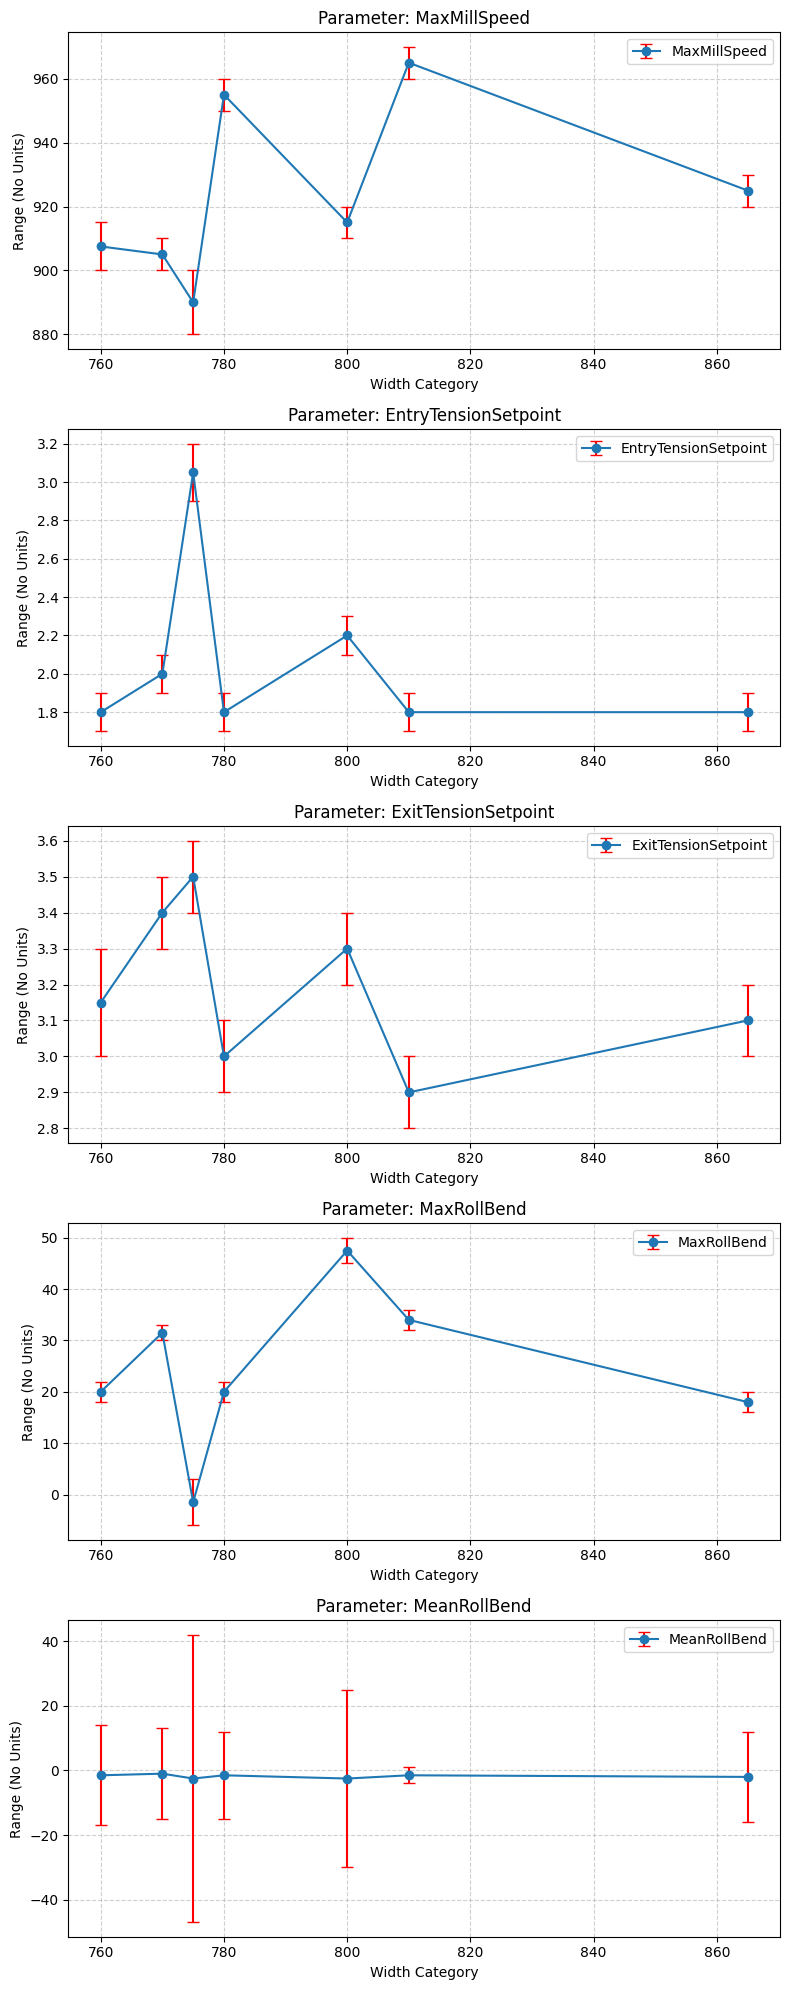

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------------------------
# 1. Dictionary of parameters and their ranges, with 'k' and 'M' expanded.
#    For example, "890k" -> "890000" and "1.75M" -> "1750000".
# ---------------------------------------------------------------------------
param_data = {
    "MaxMillSpeed": {
        760: "900-915", 770: "900-910", 775: "880-900", 780: "950-960",
        800: "910-920", 810: "960-970", 865: "920-930"
    },
    "EntryTensionSetpoint": {
        760: "1.7-1.9", 770: "1.9-2.1", 775: "2.9-3.2", 780: "1.7-1.9",
        800: "2.1-2.3", 810: "1.7-1.9", 865: "1.7-1.9"
    },
    "ExitTensionSetpoint": {
        760: "3.0-3.3", 770: "3.3-3.5", 775: "3.4-3.6", 780: "2.9-3.1",
        800: "3.2-3.4", 810: "2.8-3.0", 865: "3.0-3.2"
    },
    "MaxRollBend": {
        760: "18-22", 770: "30-33", 775: "-6--3", 780: "18-22",
        800: "45-50", 810: "32-36", 865: "16-20"
    },
    "MeanRollBend": {
        760: "-17--14", 770: "-15--13", 775: "-47--42", 780: "-15--12",
        800: "-30--25", 810: "-4--1", 865: "-16--12"
    },
}

# List of all widths for consistent ordering
width_list = [760, 770, 775, 780, 800, 810, 865]

# ---------------------------------------------------------------------------
# 2. Regex-based parsing function to handle negative values and double dashes
# ---------------------------------------------------------------------------
def parse_range(range_str):
    """
    Parses a string like '900-915' or '-0.27--0.25'
    and returns (min_value, max_value) as floats.
    Returns (0.0, 0.0) if the format is invalid.
    """
    range_str = range_str.strip()
    pattern = r'^(-?\d+(?:\.\d+)?)-{1,2}(-?\d+(?:\.\d+)?)$'
    match = re.match(pattern, range_str)
    if not match:
        return (0.0, 0.0)
    val_min, val_max = match.groups()
    return (float(val_min), float(val_max))

# ---------------------------------------------------------------------------
# 3. Plot each parameter as an error bar chart showing min-max ranges
# ---------------------------------------------------------------------------
def plot_param_ranges(param_data, width_list):
    num_params = len(param_data)
    fig, axes = plt.subplots(nrows=num_params, ncols=1, figsize=(8, 4 * num_params), squeeze=False)

    for idx, (param, width_ranges) in enumerate(param_data.items()):
        ax = axes[idx, 0]

        # Prepare data arrays
        x_vals = []
        y_mins = []
        y_maxs = []

        for w in width_list:
            if w in width_ranges:
                r_min, r_max = parse_range(width_ranges[w])
            else:
                # If no data, set dummy values
                r_min, r_max = (0.0, 0.0)

            x_vals.append(w)
            y_mins.append(r_min)
            y_maxs.append(r_max)

        x_vals = np.array(x_vals)
        y_mins = np.array(y_mins)
        y_maxs = np.array(y_maxs)

        # Midpoint and error for error bars
        y_means = (y_mins + y_maxs) / 2.0
        y_errors = (y_maxs - y_mins) / 2.0

        # Plot error bars
        ax.errorbar(x_vals, y_means, yerr=y_errors, fmt='o-', capsize=4, ecolor='red', label=param)
        ax.set_title(f"Parameter: {param}")
        ax.set_xlabel("Width Category")
        ax.set_ylabel("Range (No Units)")
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend()

    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------------
# 4. Run the plotting function
# ---------------------------------------------------------------------------
plot_param_ranges(param_data, width_list)


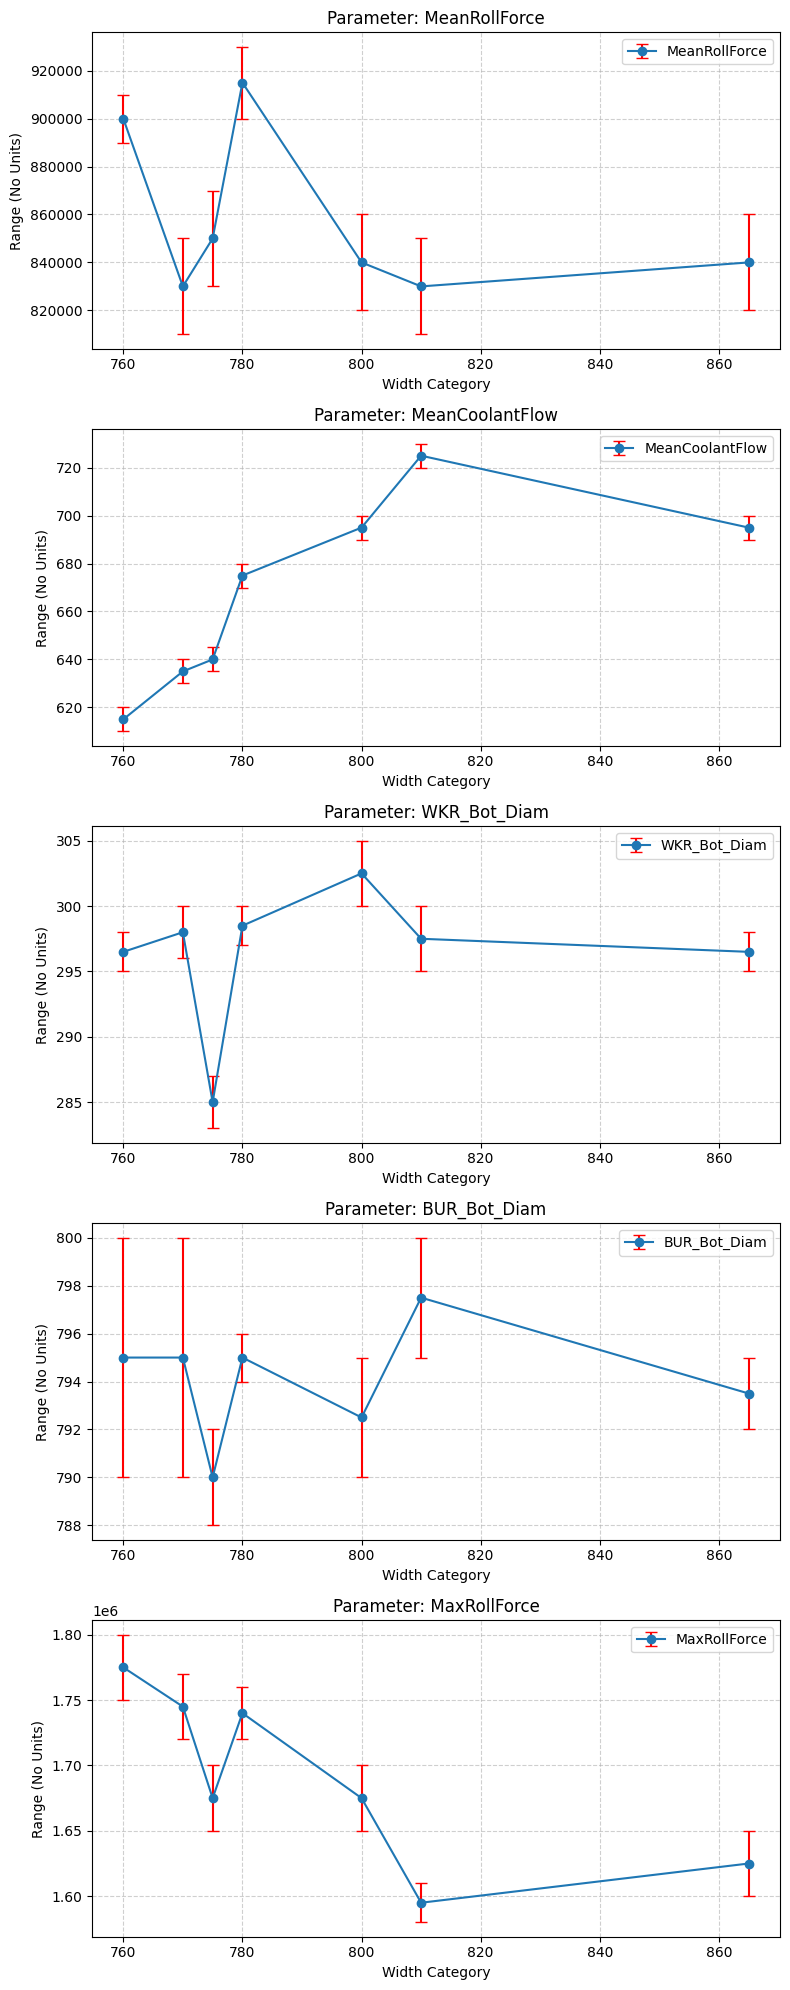

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------------------------
# 1. Dictionary of parameters and their ranges, with 'k' and 'M' expanded.
#    For example, "890k" -> "890000" and "1.75M" -> "1750000".
# ---------------------------------------------------------------------------
param_data = {

    "MeanRollForce": {
        # "890k-910k" expanded to "890000-910000"
        760: "890000-910000", 770: "810000-850000", 775: "830000-870000",
        780: "900000-930000", 800: "820000-860000", 810: "810000-850000",
        865: "820000-860000"
    },
    "MeanCoolantFlow": {
        760: "610-620", 770: "630-640", 775: "635-645", 780: "670-680",
        800: "690-700", 810: "720-730", 865: "690-700"
    },
    "WKR_Bot_Diam": {
        760: "295-298", 770: "296-300", 775: "283-287", 780: "297-300",
        800: "300-305", 810: "295-300", 865: "295-298"
    },
    "BUR_Bot_Diam": {
        760: "790-800", 770: "790-800", 775: "788-792", 780: "794-796",
        800: "790-795", 810: "795-800", 865: "792-795"
    },
    "MaxRollForce": {
        # "1.75M-1.80M" expanded to "1750000-1800000"
        760: "1750000-1800000", 770: "1720000-1770000", 775: "1650000-1700000",
        780: "1720000-1760000", 800: "1650000-1700000", 810: "1580000-1610000",
        865: "1600000-1650000"
    },
}

# List of all widths for consistent ordering
width_list = [760, 770, 775, 780, 800, 810, 865]

# ---------------------------------------------------------------------------
# 2. Regex-based parsing function to handle negative values and double dashes
# ---------------------------------------------------------------------------
def parse_range(range_str):
    """
    Parses a string like '900-915' or '-0.27--0.25'
    and returns (min_value, max_value) as floats.
    Returns (0.0, 0.0) if the format is invalid.
    """
    range_str = range_str.strip()
    pattern = r'^(-?\d+(?:\.\d+)?)-{1,2}(-?\d+(?:\.\d+)?)$'
    match = re.match(pattern, range_str)
    if not match:
        return (0.0, 0.0)
    val_min, val_max = match.groups()
    return (float(val_min), float(val_max))

# ---------------------------------------------------------------------------
# 3. Plot each parameter as an error bar chart showing min-max ranges
# ---------------------------------------------------------------------------
def plot_param_ranges(param_data, width_list):
    num_params = len(param_data)
    fig, axes = plt.subplots(nrows=num_params, ncols=1, figsize=(8, 4 * num_params), squeeze=False)

    for idx, (param, width_ranges) in enumerate(param_data.items()):
        ax = axes[idx, 0]

        # Prepare data arrays
        x_vals = []
        y_mins = []
        y_maxs = []

        for w in width_list:
            if w in width_ranges:
                r_min, r_max = parse_range(width_ranges[w])
            else:
                # If no data, set dummy values
                r_min, r_max = (0.0, 0.0)

            x_vals.append(w)
            y_mins.append(r_min)
            y_maxs.append(r_max)

        x_vals = np.array(x_vals)
        y_mins = np.array(y_mins)
        y_maxs = np.array(y_maxs)

        # Midpoint and error for error bars
        y_means = (y_mins + y_maxs) / 2.0
        y_errors = (y_maxs - y_mins) / 2.0

        # Plot error bars
        ax.errorbar(x_vals, y_means, yerr=y_errors, fmt='o-', capsize=4, ecolor='red', label=param)
        ax.set_title(f"Parameter: {param}")
        ax.set_xlabel("Width Category")
        ax.set_ylabel("Range (No Units)")
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend()

    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------------
# 4. Run the plotting function
# ---------------------------------------------------------------------------
plot_param_ranges(param_data, width_list)


#2. Addressing Problem Statement 2


## 1. Random Forest Feature Importance

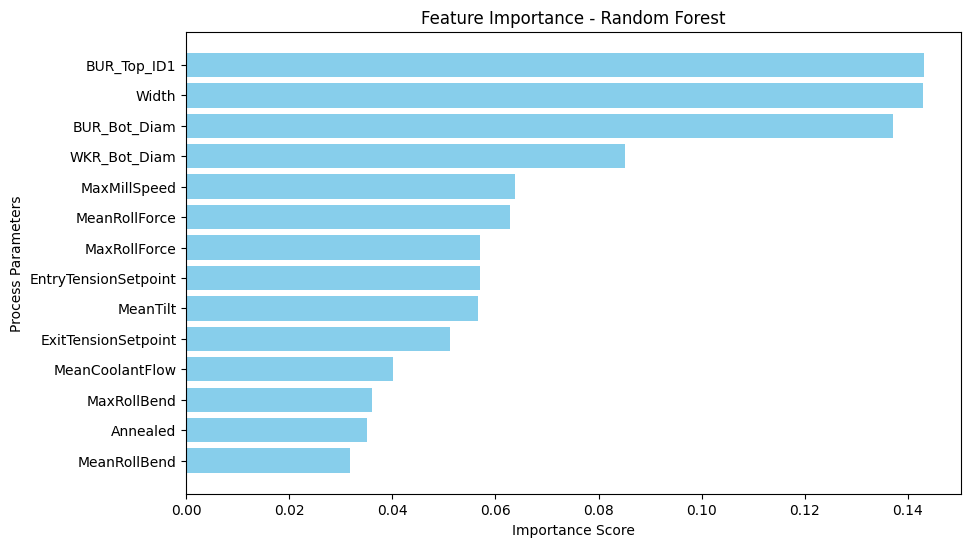

,Feature,Importance
9,BUR_Top_ID1,0.143195
0,Width,0.142999
11,BUR_Bot_Diam,0.137185
10,WKR_Bot_Diam,0.085048
2,MaxMillSpeed,0.063707
7,MeanRollForce,0.062893
12,MaxRollForce,0.057068
3,EntryTensionSetpoint,0.056976
13,MeanTilt,0.056606
4,ExitTensionSetpoint,0.051236


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Prepare features and target
X = data.drop(columns=['Scoring', 'BUR_Bot_ID'])  # Exclude categorical variable for now
y = data['Scoring']

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Process Parameters')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Display top features
feature_importance_df


## 2. PCA

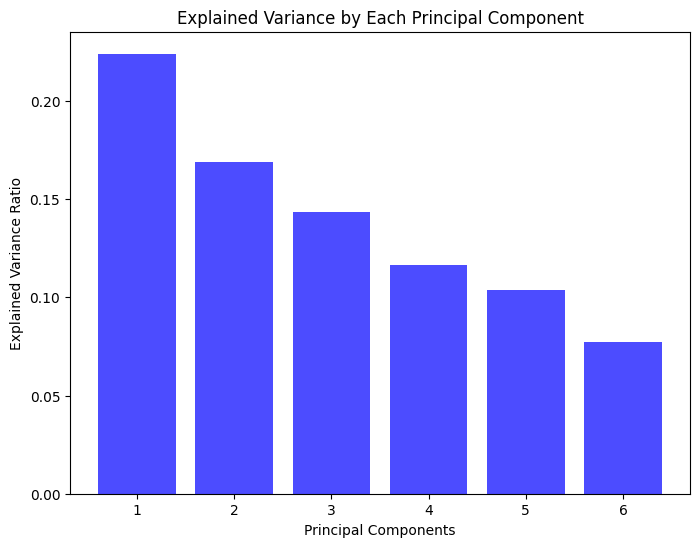

Cumulative Explained Variance: [0.22405412 0.39312148 0.53680505 0.65350933 0.75727413 0.83473413]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X_pca = data[['MaxMillSpeed', 'EntryTensionSetpoint',	'ExitTensionSetpoint',	'MaxRollBend',	'MeanRollBend',
              'MeanRollForce', 'MeanCoolantFlow',	'BUR_Top_ID1',	'WKR_Bot_Diam',	'BUR_Bot_Diam',	'MaxRollForce',	'MeanTilt']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)


pca = PCA(n_components=6)
X_pca_result = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

cumulative_variance = np.cumsum(explained_variance)
print(f'Cumulative Explained Variance: {cumulative_variance}')

In [ ]:
import pandas as pd

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=X_pca.columns)

print("PCA Loadings (Feature Contributions):")
print(loadings)

PCA Loadings (Feature Contributions):
                           PC1       PC2       PC3       PC4       PC5  \
MaxMillSpeed          0.069984  0.167418  0.310208  0.153729  0.578598   
EntryTensionSetpoint -0.226258  0.598996 -0.021074 -0.157095 -0.116864   
ExitTensionSetpoint  -0.278310  0.575561 -0.017106 -0.146042 -0.059171   
MaxRollBend           0.329902  0.374180 -0.222177  0.362923 -0.185798   
MeanRollBend          0.344726  0.175110 -0.197002  0.533242 -0.024257   
MeanRollForce         0.515992 -0.132260 -0.022463 -0.274193 -0.126322   
MeanCoolantFlow       0.217868  0.153245  0.250861  0.145320  0.524892   
BUR_Top_ID1           0.068591  0.064881  0.624804  0.128573 -0.270250   
WKR_Bot_Diam          0.349537  0.118790  0.100053 -0.485203  0.136475   
BUR_Bot_Diam          0.018238  0.004252  0.590296  0.082468 -0.374389   
MaxRollForce          0.443633  0.191628 -0.049677 -0.251065 -0.207882   
MeanTilt              0.032315  0.123265  0.010858 -0.310183  0.215511   


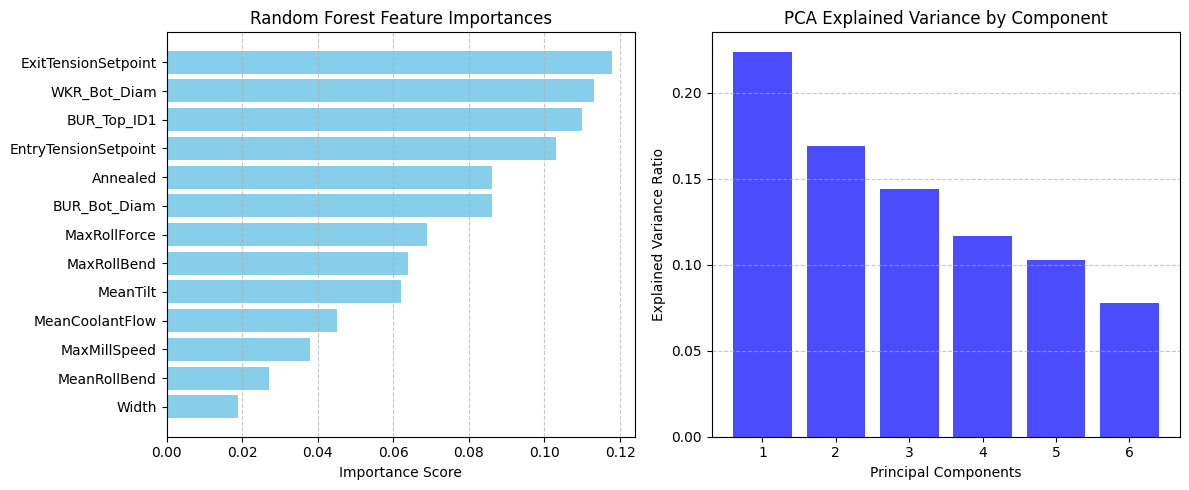

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# Simulated Data
# --------------------
# Random Forest feature importances (from your table)
features = [
    "ExitTensionSetpoint", "WKR_Bot_Diam", "BUR_Top_ID1",
    "EntryTensionSetpoint", "BUR_Bot_Diam", "Annealed",
    "MaxRollForce", "MaxRollBend", "MeanTilt",
    "MeanCoolantFlow", "MaxMillSpeed", "MeanRollBend", "Width"
]
importances = [
    0.118, 0.113, 0.110,
    0.103, 0.086, 0.086,
    0.069, 0.064, 0.062,
    0.045, 0.038, 0.027, 0.019
]

# PCA explained variance ratios (example from your text)
explained_variance = [0.224, 0.169, 0.144, 0.117, 0.103, 0.078]
# (These sum to about 0.835, i.e., 83.5%)

# --------------------
# Plotting
# --------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# --- Subplot 1: Random Forest Feature Importances ---
ax1 = axes[0]
# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = np.array(importances)[sorted_idx]
sorted_features = [features[i] for i in sorted_idx]

ax1.barh(sorted_features, sorted_importances, color='skyblue')
ax1.set_xlabel('Importance Score')
ax1.set_title('Random Forest Feature Importances')
ax1.invert_yaxis()  # So the top feature is at the top of the plot
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# --- Subplot 2: PCA Explained Variance ---
ax2 = axes[1]
components = np.arange(1, len(explained_variance)+1)
ax2.bar(components, explained_variance, color='blue', alpha=0.7)
ax2.set_xticks(components)
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.set_title('PCA Explained Variance by Component')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
